In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Continuous Probabilistic Methods Exercises

In [2]:
def get_lower_and_upper_bounds(series, multiplier = 1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return q1 - (multiplier * iqr), q3 + (multiplier * iqr)

## 1

Using lemonade.csv dataset and focusing on continuous variables:

In [3]:
lemonade = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [4]:
lemonade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
lemonade.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [6]:
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [16]:
# Let's make the Date the index
lemonade.Date = pd.to_datetime(lemonade.Date)
lemonade = lemonade.set_index('Date')
lemonade.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          365 non-null    object 
 1   Temperature  365 non-null    float64
 2   Rainfall     365 non-null    float64
 3   Flyers       365 non-null    int64  
 4   Price        365 non-null    float64
 5   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 20.0+ KB


### 1a

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [7]:
for column in lemonade.select_dtypes(include = 'number').columns:
    lower_bound, _ = get_lower_and_upper_bounds(lemonade[column])
    print(lemonade[lemonade[column] < lower_bound][column], end = '\n\n')

364    15.1
Name: Temperature, dtype: float64

Series([], Name: Rainfall, dtype: float64)

324   -38
Name: Flyers, dtype: int64

Series([], Name: Price, dtype: float64)

Series([], Name: Sales, dtype: int64)



The lower outlier for Temperature seems reasonable enough assuming this is fahrenheit. That is especially cold, but the value doesn't seem unusual in any other way.

In [18]:
# Let's see the row with that temperature
lemonade[lemonade.Temperature == 15.1]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7


In [19]:
# Let's see the surrounding values.
lemonade.loc['2017-12-28' : '2017-12-31']

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-12-28,Thursday,37.8,1.25,32,0.5,16
2017-12-29,Friday,39.5,1.25,17,0.5,15
2017-12-30,Saturday,30.9,1.43,22,0.5,13
2017-12-31,Sunday,15.1,2.50,9,0.5,7


This could have been a sudden drop in temperature from one day to the next which wouldn't be particularly unusual. We can keep this value.

The lower outlier for Flyers does seem odd. Assuming this columns is the number of flyers on a particular day, then -38 would likely be an incorrectly entered data point.

In [20]:
# Let's see that row
lemonade[lemonade.Flyers == -38]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


In [21]:
# Let's see the surrounding rows
lemonade.loc['2017-11-19' : '2017-11-23']

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-11-19,Sunday,55.9,0.87,34,0.5,23
2017-11-20,Monday,55.6,0.87,41,0.5,22
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20
2017-11-22,Wednesday,48.7,1.00,40,0.5,19
2017-11-23,Thursday,51.9,0.87,47,0.5,23


This one looks definitely looks like a clerical error. We can probably just flip the sign and keep the value.

### 1b

Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [8]:
for column in lemonade.select_dtypes(include = 'number').columns:
    _, upper_bound = get_lower_and_upper_bounds(lemonade[column])
    print(lemonade[lemonade[column] > upper_bound][column], end = '\n\n')

41    212.0
Name: Temperature, dtype: float64

0      2.00
1      1.33
2      1.33
5      1.54
6      1.54
10     1.54
11     1.33
12     1.33
15     1.67
16     1.43
19     1.43
23     1.54
27     1.33
28     1.33
337    1.54
338    1.82
342    1.43
343    1.82
345    1.33
346    1.43
347    1.54
350    1.33
351    1.43
354    1.33
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

166    77
194    80
Name: Flyers, dtype: int64

Series([], Name: Price, dtype: float64)

181    143
182    158
183    235
184    534
Name: Sales, dtype: int64



The upper outlier for Temperature seems odd. A temperature of 212 is likely not realistic.

In [22]:
# Let's see the row
lemonade[lemonade.Temperature == 212]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21


In [23]:
# Let's see the surrounding rows
lemonade.loc['2017-02-09' : '2017-02-13']

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-02-09,Thursday,42.7,1.00,39,0.5,19
2017-02-10,Friday,50.0,0.91,40,0.5,20
2017-02-11,Saturday,212.0,0.91,35,0.5,21
2017-02-12,Sunday,55.6,0.83,41,0.5,22
2017-02-13,Monday,46.4,1.11,34,0.5,18


This was almost certainly an incorrectly entered value, but it's hard to tell what the real value should have been. This one should be dropped.

The outliers in Rainfall all seem reasonable. There is no reason to suspect that all of these values are incorrect in some way. These should be kept.

The outliers in Flyers seem reasonable. 77 or 80 flyers is a lot, but there is no reason to suspect that so many flyers could have been posted.

In [24]:
# Let's see the rows
lemonade[lemonade.Flyers >= 77]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41
2017-07-14,Friday,92.0,0.50,80,0.5,40


In [27]:
# Let's see some of the surrounding rows
lemonade.loc['2017-06-14' : '2017-06-18']

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-06-14,Wednesday,80.5,0.57,48,0.5,35
2017-06-15,Thursday,84.8,0.56,50,0.5,36
2017-06-16,Friday,99.3,0.47,77,0.5,41
2017-06-17,Saturday,76.3,0.65,47,0.5,31
2017-06-18,Sunday,72.6,0.59,60,0.5,32


In [28]:
lemonade.loc['2017-07-12' : '2017-07-16']

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-07-12,Wednesday,80.2,0.56,39,0.5,34
2017-07-13,Thursday,78.9,0.61,49,0.5,33
2017-07-14,Friday,92.0,0.50,80,0.5,40
2017-07-15,Saturday,82.5,0.54,56,0.5,35
2017-07-16,Sunday,79.2,0.59,50,0.5,34


It's possible that they may have been particularly aggressive with handing out flyers on these particular days. We should keep these values.

The outliers in Sales may be odd.

In [29]:
# Let's see these rows
lemonade[lemonade.Sales >= 134]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143
2017-07-02,Sunday,93.4,0.51,68,0.5,158
2017-07-03,Monday,81.5,0.54,68,0.5,235
2017-07-04,Tuesday,84.2,0.59,49,0.5,534


In [30]:
# Let's see some surrounding rows
lemonade.loc['2017-06-29' : '2017-07-06']

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-06-29,Thursday,86.5,0.54,64,0.5,35
2017-06-30,Friday,89.4,0.53,47,0.5,38
2017-07-01,Saturday,102.9,0.47,59,0.5,143
2017-07-02,Sunday,93.4,0.51,68,0.5,158
2017-07-03,Monday,81.5,0.54,68,0.5,235
2017-07-04,Tuesday,84.2,0.59,49,0.5,534
2017-07-05,Wednesday,93.0,0.40,55,0.5,40
2017-07-06,Thursday,91.7,0.51,46,0.5,39


It's possible these may have been clerical errors, but it's difficult to tell. The safe thing to do would be to remove these values unless we knew for sure that these were correct values.

### 1c

Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [9]:
for column in lemonade.select_dtypes(include = 'number').columns:
    lower_bound, _ = get_lower_and_upper_bounds(lemonade[column], 3)
    print(lemonade[lemonade[column] < lower_bound][column], end = '\n\n')

Series([], Name: Temperature, dtype: float64)

Series([], Name: Rainfall, dtype: float64)

324   -38
Name: Flyers, dtype: int64

Series([], Name: Price, dtype: float64)

Series([], Name: Sales, dtype: int64)



The only outlier here is the -38 in Flyers. It was stated before that this is probably erroneous, but we can flip the sign to make it correct.

### 1d

Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [10]:
for column in lemonade.select_dtypes(include = 'number').columns:
    _, upper_bound = get_lower_and_upper_bounds(lemonade[column], 3)
    print(lemonade[lemonade[column] > upper_bound][column], end = '\n\n')

41    212.0
Name: Temperature, dtype: float64

0      2.00
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

Series([], Name: Flyers, dtype: int64)

Series([], Name: Price, dtype: float64)

181    143
182    158
183    235
184    534
Name: Sales, dtype: int64



As stated before the outlier in Temperature is likely erroneous and should be removed.

There are a lot less outliers for Rainfall now. Again though, there is no reason to suspect that these might be erroneous, we should keep them.

We still have the same outliers in Sales so the decision made before remains.

## 2

Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

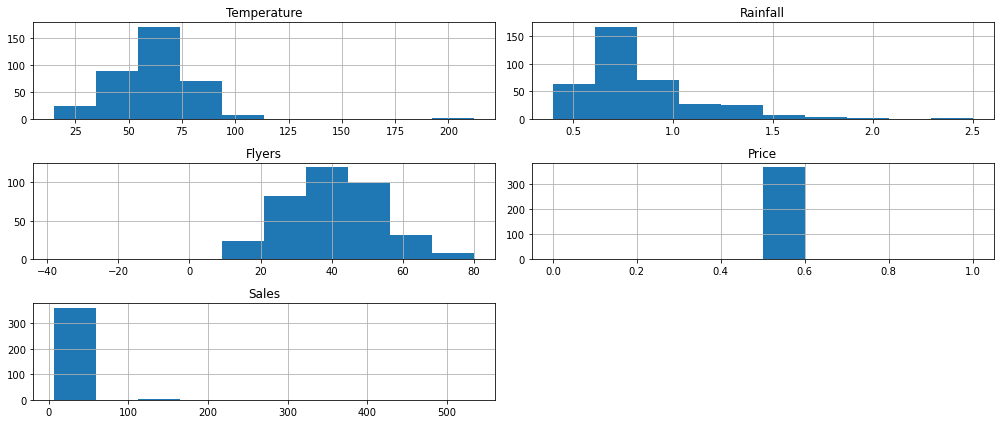

In [11]:
lemonade.hist(figsize = (14, 6))
plt.tight_layout();

Temperature, Rainfall, and Flyers look roughly normal.

### 2a

Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
- Should certain outliers be kept or removed?

In [12]:
lemonade.Temperature.std()

18.08589229830261

In [13]:
for column in ['Temperature', 'Rainfall', 'Flyers']:
    zscores = pd.Series((lemonade[column] - lemonade[column].mean()) / lemonade[column].std())
    print(lemonade[zscores.abs() >= 2][column], end = '\n\n')

41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64

0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: Flyers, dtype: int64



It does make sense that these would all be outliers since a lot of these values are near the flatter part of the bell curve. Aside from the 212 temperature and -38 flyers mentioned previously everything seems reasonable and should be kept.

## 3

Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [14]:
for column in ['Temperature', 'Rainfall', 'Flyers']:
    zscores = pd.Series((lemonade[column] - lemonade[column].mean()) / lemonade[column].std())
    print(lemonade[zscores.abs() >= 3][column], end = '\n\n')

41    212.0
Name: Temperature, dtype: float64

0      2.00
15     1.67
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

324   -38
Name: Flyers, dtype: int64



Now we see a lot of the same outliers we saw in questions 1c and 1d.